In [47]:

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras import models
# from keras.layers import Dense
#from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array

## importing libraries

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import time
from sklearn import preprocessing
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import sklearn.metrics
import math
from numpy import mean
from numpy import std

from sklearn.metrics import mean_squared_error, r2_score


print('Done importing libraries')

Done importing libraries


In [48]:
## Functions used throughout code
from sklearn.model_selection import cross_validate

def cross_validate_scores(model_var, X_var, y_var):
    scoring_metrics = ["explained_variance", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error", "neg_median_absolute_error", "r2"] #"neg_mean_squared_log_error"
    scores = cross_validate(model_var, X_var, y_var, scoring=scoring_metrics, cv=10)
    
    #calculate adj r^2
    n = len(X_train)
    k = len(X.columns)
    adj_r2_list = []
    for r2 in scores["test_r2"]:
        adj_r2 = 1-(((1-r2)*(n-1))/(n-k-1))
        adj_r2_list.append(adj_r2)   
    scores["adj_r2"] = adj_r2_list
   
    print(scores["test_r2"])
    for key in scores:
        scores[key] = round(mean(scores[key]), 5)
   
    return scores


def resid_plot(model_var, X_train_var, X_test_var):
    #define plot
    fig, ax = plt.subplots()
    plt.style.use("fivethirtyeight")

    #plot reside in train data
    plt.scatter(model_var.predict(X_train_var), model_var.predict(X_train_var) - y_train, color = "blue", s = 5, label = 'Train data')
    
    #plot resid in test data
    plt.scatter(model_var.predict(X_test_var), model_var.predict(X_test_var) - y_test, color = "red", s = 5, label = 'Test data')
    
    #plot zero error line for easier visibility
    plt.hlines(y = 0, xmin = 0, xmax = ax.get_xbound()[1], linewidth = 1, color = "black")
    
    #plot legend and title
    plt.legend(loc = 'best')
    plt.xlabel(xlabel="Predicted Value (μg/m^3)")
    plt.ylabel(ylabel="Residual (μg/m^3)")
    plt.title("Residual errors")

    #show plot
    plt.show()

In [49]:
df = pd.read_csv("../Data/Bangkok2021WSTAT.csv")
df = df.dropna()

df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8712 entries, 0 to 8711
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       8712 non-null   object 
 1   Time       8712 non-null   object 
 2   O3         8712 non-null   float64
 3   PM2.5      8712 non-null   float64
 4   PM10       8712 non-null   float64
 5   CO         8712 non-null   float64
 6   SO2        8712 non-null   float64
 7   NO2        8712 non-null   float64
 8   NH3        8712 non-null   float64
 9   Temp       8712 non-null   float64
 10  RHum       8712 non-null   float64
 11  WSpd       8712 non-null   float64
 12  O3_P1      8712 non-null   float64
 13  O3_P4      8712 non-null   float64
 14  O3_P8      8712 non-null   float64
 15  O3_P24     8712 non-null   float64
 16  PM2.5_P1   8712 non-null   float64
 17  PM2.5_P4   8712 non-null   float64
 18  PM2.5_P8   8712 non-null   float64
 19  PM2.5_P24  8712 non-null   float64
dtypes: float

In [50]:
X = df[["O3", "PM2.5", "PM10", "CO", "SO2", "NO2", "Temp", "RHum", "WSpd"]]

y = df['PM2.5_P1']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.1)

print("Training Dataset Size: {} trials".format(X_train.shape[0]))
print("Testing Dataset Size: {} trial".format(X_test.shape[0]))

print('Variables Defined')

Training Dataset Size: 7840 trials
Testing Dataset Size: 872 trial
Variables Defined


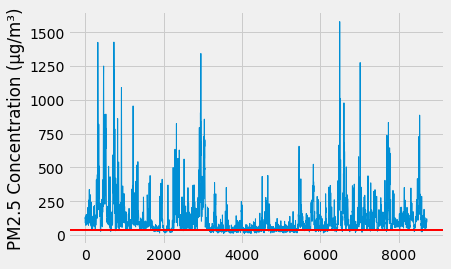

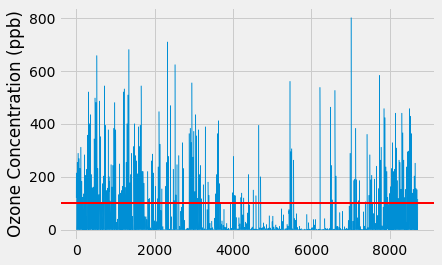

In [51]:
#PLOT PM2.5 AND O3 WITH COMPARISON TO MAXIMUM AMOUNT

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(df["PM2.5"], linewidth = 1)
plt.axhline(35, color = "red", linewidth = 2)
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.show()

plt.plot(df["O3"], linewidth = .5)
plt.axhline(100, color = "red", linewidth = 2)
plt.ylabel("Ozone Concentration (ppb)")
plt.show()

In [52]:
from sklearn import preprocessing
#robust scaler
scaler = preprocessing.RobustScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)
# X_scaled = scaler.fit_transform(X)

#minmax
# X_train_scaled = preprocessing.minmax_scale(X_train, feature_range = (0,1))
# X_test_scaled =  preprocessing.minmax_scale(X_test, feature_range = (0,1))
# X_scaled =  preprocessing.minmax_scale(X, feature_range = (0,1))

#StandardScaler
# scaler = preprocessing.StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)
# X_scaled = scaler.fit_transform(X)

print('Data Scaled')

Data Scaled


Coefficients: 
Intercept: -8.737495401307797
O3: 0.0
PM2.5: 0.8952160976594121
PM10: 0.0
CO: 0.0016929684723528378
SO2: 0.05848584977709882
NO2: 0.15362163945772053
Temp: 0.0
RHum: 0.0
WSpd: 0.7338046364156482
Scores Training
[0.95239215 0.91072056 0.91944028 0.94943944 0.78219969 0.85960735
 0.92537932 0.94653016 0.90237481 0.91878291]
fit_time: 0.00595
score_time: 0.00395
test_explained_variance: 0.90765
test_neg_mean_absolute_error: -19.61484
test_neg_mean_squared_error: -1352.26598
test_neg_root_mean_squared_error: -34.62014
test_neg_median_absolute_error: -10.16368
test_r2: 0.90669
adj_r2: 0.90658


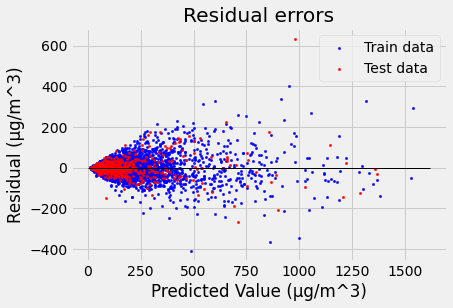

In [53]:
#multiple linear regression
from sklearn.linear_model import LinearRegression


multi_lin_reg = LinearRegression(positive=True)
multi_lin_reg.fit(X_train, y_train)

#Print Coefficients and Weight
print("Coefficients: ")
print("Intercept: " + str(multi_lin_reg.intercept_))
for i in range(len(X.columns)):
    print(X.columns[i] + ": " + str(multi_lin_reg.coef_[i]))

print("Scores Training")
multi_lin_reg_scores = cross_validate_scores(multi_lin_reg, X, y)
for key in multi_lin_reg_scores:
    print(key + ": " + str(multi_lin_reg_scores[key]))

resid_plot(multi_lin_reg, X_train, X_test)


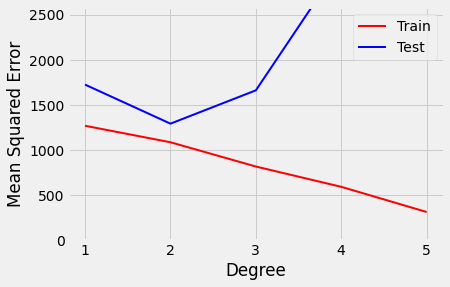

Degrere of Polynomial: 2
Scores Training
[0.95249721 0.91458969 0.91939793 0.94756234 0.79088903 0.86453223
 0.92983086 0.94836571 0.90368489 0.91247414]
fit_time: 0.03768
score_time: 0.00243
test_explained_variance: 0.90924
test_neg_mean_absolute_error: -19.19422
test_neg_mean_squared_error: -1343.264
test_neg_root_mean_squared_error: -34.47312
test_neg_median_absolute_error: -9.53518
test_r2: 0.90838
adj_r2: 0.90828


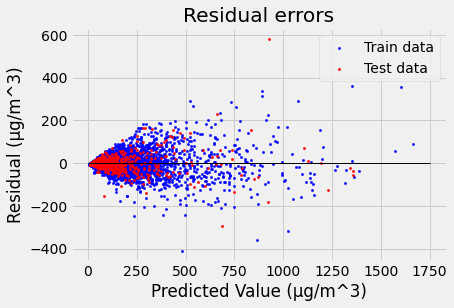

In [54]:
## polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def poly_fit(n):
  train_mse = []
  test_mse = []
  for i in range(1,n+1):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly_train = poly_reg.fit_transform(X_train_scaled)
    X_poly_test = poly_reg.fit_transform(X_test_scaled)

    linreg_poly = LinearRegression()
    linreg_poly.fit(X_poly_train, y_train)
    train_mse.append((mean_squared_error(y_train, linreg_poly.predict(X_poly_train))))
    test_mse.append((mean_squared_error(y_test, linreg_poly.predict(X_poly_test))))
  plt.plot(np.arange(1,n+1,1), train_mse, color="red", linewidth = 2, label = "Train")
  plt.plot(np.arange(1,n+1,1), test_mse, color="blue", linewidth = 2, label = "Test")
  plt.ylim(0, 2*min(test_mse))
  plt.style.use("fivethirtyeight")
  plt.xlabel("Degree")
  plt.ylabel("Mean Squared Error")
  plt.xticks(np.arange(1,n+1,1))
  plt.legend(loc = "best")
  plt.show()
  return test_mse.index(min(test_mse[1:])) + 1 #returns the best degree train

degree = poly_fit(5)
print("Degrere of Polynomial: " + str(degree))
poly_reg = PolynomialFeatures(degree=degree)
X_poly = poly_reg.fit_transform(X_scaled)
X_train_poly = poly_reg.fit_transform(X_train_scaled)
X_test_poly = poly_reg.fit_transform(X_test_scaled)


linreg_poly = LinearRegression(positive= True)
linreg_poly.fit(X_train_poly, y_train)

print("Scores Training")
poly_reg_scores = cross_validate_scores(linreg_poly, X_poly, y)
for key in poly_reg_scores:
    print(key + ": " + str(poly_reg_scores[key]))

resid_plot(linreg_poly, X_train_poly, X_test_poly)

Coefficients: 
Intercept: 80.6315428644825
9
O3: 0.0
PM2.5: 86.90757936465212
PM10: 0.0
CO: 12.470475690204484
SO2: 0.7515382240555867
NO2: 0.0
Temp: 0.0
RHum: 2.16701647247847
WSpd: 0.40295152254808814
Scores Training
[0.94816623 0.91398578 0.91602874 0.94587466 0.79685318 0.87373733
 0.93296389 0.94227636 0.89809114 0.90833169]
fit_time: 0.03138
score_time: 0.0018
test_explained_variance: 0.90903
test_neg_mean_absolute_error: -19.57678
test_neg_mean_squared_error: -1416.21831
test_neg_root_mean_squared_error: -35.18025
test_neg_median_absolute_error: -9.47751
test_r2: 0.90763
adj_r2: 0.90752


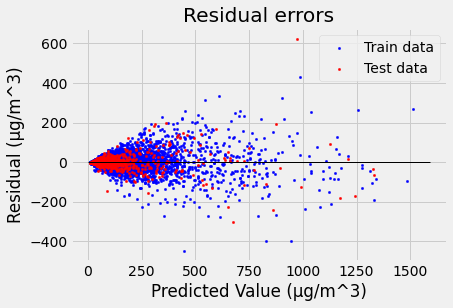

In [55]:
## RANSAC

from sklearn.linear_model import RANSACRegressor, LinearRegression

ransac_reg = RANSACRegressor(LinearRegression(positive=True), random_state = 42)
ransac_reg.fit(X_train_scaled, y_train)

#Print Coefficients and Weight
print("Coefficients: ")
print("Intercept: " + str(ransac_reg.estimator_.intercept_))
print(len(ransac_reg.estimator_.coef_))
for i in range(len(X.columns)):
    print(X.columns[i] + ": " + str(ransac_reg.estimator_.coef_[i]))

print("Scores Training")
ransac_reg_scores = cross_validate_scores(ransac_reg, X_scaled, y)
for key in ransac_reg_scores:
    print(key + ": " + str(ransac_reg_scores[key]))

resid_plot(ransac_reg, X_train_scaled, X_test_scaled)



Tree: 
aaa
Scores Training
[0.93254732 0.89686511 0.9058207  0.93462651 0.75960799 0.85282021
 0.90822367 0.89170931 0.86976169 0.90712568]
fit_time: 0.02416
score_time: 0.00284
test_explained_variance: 0.88712
test_neg_mean_absolute_error: -21.26314
test_neg_mean_squared_error: -1868.20214
test_neg_root_mean_squared_error: -39.93914
test_neg_median_absolute_error: -10.57154
test_r2: 0.88591
adj_r2: 0.88578


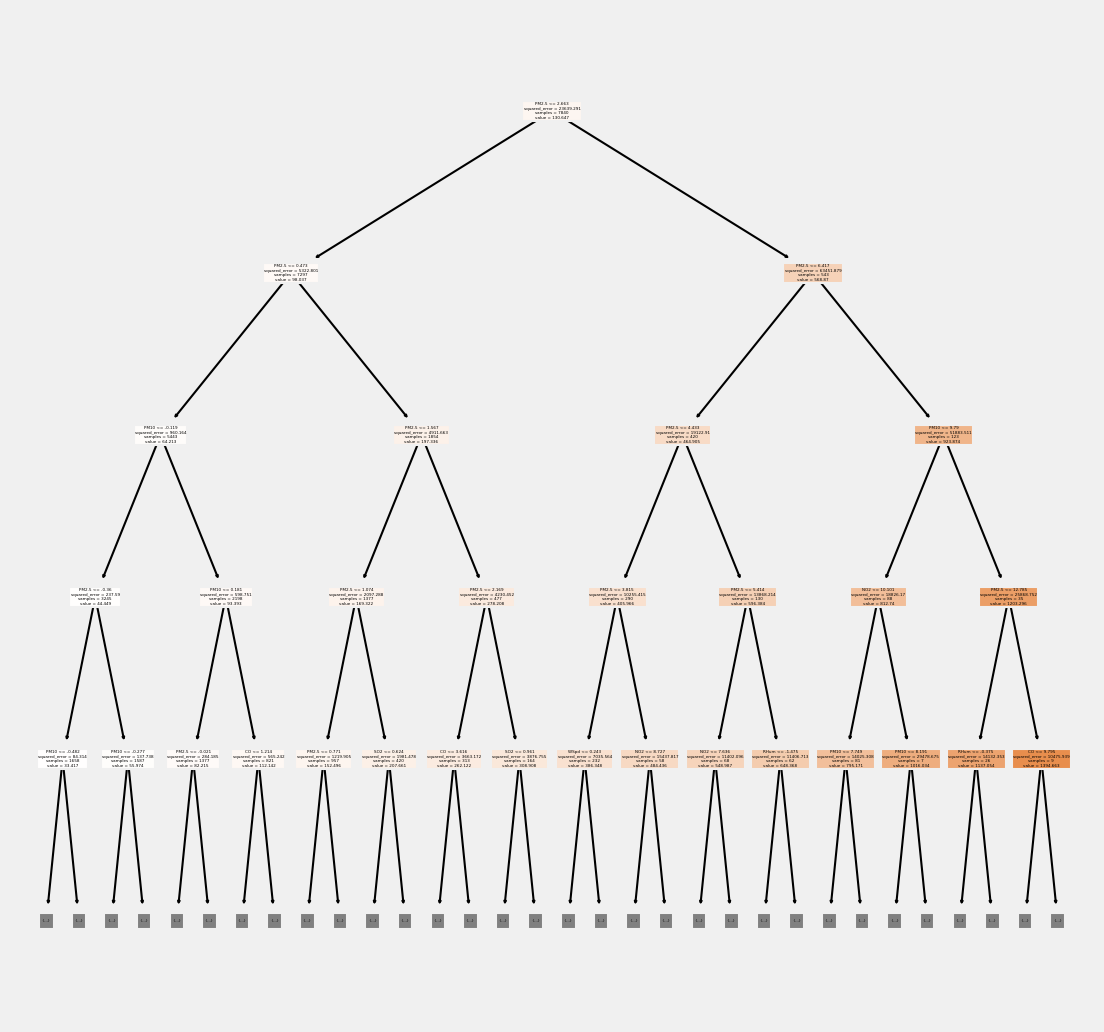

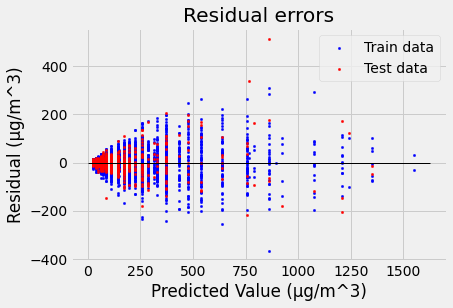

In [56]:
## Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


decision_tree_reg = DecisionTreeRegressor(random_state = 42, max_depth = 5)
decision_tree_reg.fit(X_train_scaled, y_train)


#Print Coefficients and Weight
print("Tree: ")

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree_reg, max_depth = 4, feature_names = X.columns, filled = True)

print("aaa")
# dot_data = tree.export_graphviz(decision_tree_reg,out_file=None,feature_names=X.columns)
# graph = graphviz.Source(dot_data)
# graph.render("image",view=True)

# import export_graphviz
# from sklearn.tree import export_graphviz 
  
# # export the decision tree to a tree.dot file
# # for visualizing the plot easily anywhere
# export_graphviz(decision_tree_reg, out_file ='tree.dot',
#                feature_names =X.columns, view=True) 

print("Scores Training")
decision_tree_reg_scores = cross_validate_scores(decision_tree_reg, X_scaled, y)
for key in decision_tree_reg_scores:
    print(key + ": " + str(decision_tree_reg_scores[key]))


resid_plot(decision_tree_reg, X_train_scaled, X_test_scaled)

Scores Training
[0.93081978 0.91838483 0.91136364 0.94583235 0.79678793 0.85880212
 0.92419457 0.94354932 0.89516953 0.92730699]
fit_time: 5.27146
score_time: 0.03704
test_explained_variance: 0.90603
test_neg_mean_absolute_error: -19.46887
test_neg_mean_squared_error: -1532.55625
test_neg_root_mean_squared_error: -36.06105
test_neg_median_absolute_error: -8.9196
test_r2: 0.90522
adj_r2: 0.90511


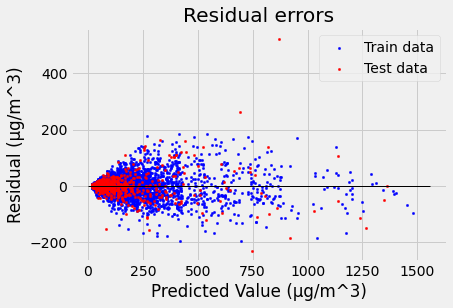

Tree: 


In [57]:
## Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

random_forest_reg = RandomForestRegressor(random_state = 42, max_depth = 7, n_estimators = 300)
random_forest_reg.fit(X_train_scaled, y_train)

# random_forest = RandomForestRegressor()
# random_forest.fit(X_train_scaled, y_train)
# ### Grid Search ###
# num_leafs = [1,2,4,6,10]

# parameters = [{'n_estimators' : range(100,400,25),
#              'max_depth': range(1,10,2),
#              'min_samples_leaf':num_leafs
#              }]

# random_forest_reg = GridSearchCV(estimator=random_forest, param_grid=parameters,cv = 10)
# random_forest_reg.fit(X_train_scaled, y_train)
# print("found best param")
# print(random_forest_reg.best_params_)

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# sklearn.tree.plot_tree(random_forest_reg, max_depth = 4, feature_names = X.columns, filled = True)


print("Scores Training")
random_forest_reg_scores = cross_validate_scores(random_forest_reg, X_scaled, y)
for key in random_forest_reg_scores:
    print(key + ": " + str(random_forest_reg_scores[key]))


resid_plot(random_forest_reg, X_train_scaled, X_test_scaled)

print("Tree: ")

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# sklearn.tree.plot_tree(random_forest_reg, max_depth = 4, feature_names = X.columns, filled = True)


Scores Training
[0.91516769 0.89590728 0.88202065 0.90943576 0.71762752 0.83241607
 0.90891354 0.90946566 0.83855006 0.88132503]
fit_time: 0.74695
score_time: 0.02198
test_explained_variance: 0.87222
test_neg_mean_absolute_error: -23.48182
test_neg_mean_squared_error: -2149.90319
test_neg_root_mean_squared_error: -42.7852
test_neg_median_absolute_error: -12.0835
test_r2: 0.86908
adj_r2: 0.86893


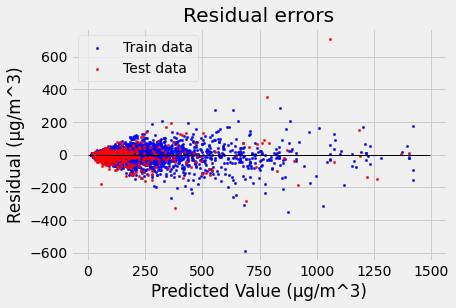

In [58]:
## K Nearest Neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# knn_model = KNeighborsRegressor(n_neighbors=3)
# knn_model.fit(X_train_scaled, y_train)

parameters = {"n_neighbors": range(1, 5)}
knn_model = GridSearchCV(KNeighborsRegressor(), parameters)
knn_model.fit(X_train_scaled, y_train)

print("Scores Training")
knn_model_scores = cross_validate_scores(knn_model, X_scaled, y)
for key in knn_model_scores:
    print(key + ": " + str(knn_model_scores[key]))


resid_plot(knn_model, X_train_scaled, X_test_scaled)

[157.25666306 157.25666306 157.25666306 ... 157.25666306 157.25666306
 157.25666306]
Scores Training
[-0.06694759  0.32986334  0.60837368  0.27239961  0.41620588  0.74948571
  0.68043057  0.26720286  0.35348986  0.44069002]
fit_time: 2.85196
score_time: 0.67781
test_explained_variance: 0.45439
test_neg_mean_absolute_error: -44.99825
test_neg_mean_squared_error: -16459.74351
test_neg_root_mean_squared_error: -106.06407
test_neg_median_absolute_error: -13.39845
test_r2: 0.40512
adj_r2: 0.40444


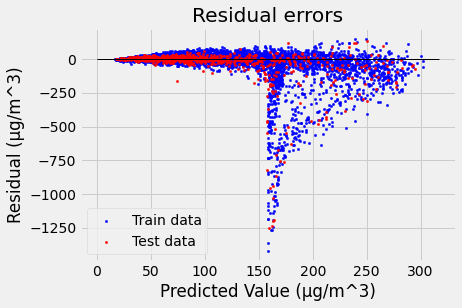

In [59]:
## SVM

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# parameters = {
#     "kernel": ["rbf"],
#     "C": [1,10,10,100,1000],
#     "gamma": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
#     
# }

# svm_reg = GridSearchCV(SVR(), parameters, cv=5, verbose=2)

svm_reg = SVR(kernel='rbf', gamma = 'auto', epsilon = .0001)
svm_reg.fit(X_train_scaled, y_train)
print(svm_reg.predict(X_train.values))

print("Scores Training")
svm_reg_scores = cross_validate_scores(svm_reg, X_scaled, y)
for key in svm_reg_scores:
    print(key + ": " + str(svm_reg_scores[key]))

resid_plot(svm_reg, X_train_scaled, X_test_scaled)

In [60]:
print(X_train.values)

[[8.082e+01 4.073e+01 4.073e+01 ... 3.260e+01 5.700e+01 5.500e+00]
 [1.300e-01 3.802e+02 3.802e+02 ... 2.450e+01 7.700e+01 0.000e+00]
 [1.000e-02 5.268e+01 5.268e+01 ... 2.980e+01 7.100e+01 3.600e+00]
 ...
 [0.000e+00 2.867e+01 2.867e+01 ... 2.700e+01 9.200e+01 3.600e+00]
 [5.300e-01 1.793e+02 1.793e+02 ... 2.570e+01 7.100e+01 0.000e+00]
 [6.600e-01 7.386e+01 7.386e+01 ... 2.580e+01 9.400e+01 0.000e+00]]


Scores Training
[ 0.90056133  0.87150771  0.82063655  0.91586249 -1.50123997  0.31391303
  0.66816058  0.91358952  0.84410663  0.8087572 ]
fit_time: 0.45122
score_time: 0.0084
test_explained_variance: 0.84866
test_neg_mean_absolute_error: -41.60359
test_neg_mean_squared_error: -2967.17305
test_neg_root_mean_squared_error: -53.3269
test_neg_median_absolute_error: -37.4072
test_r2: 0.55559
adj_r2: 0.55507


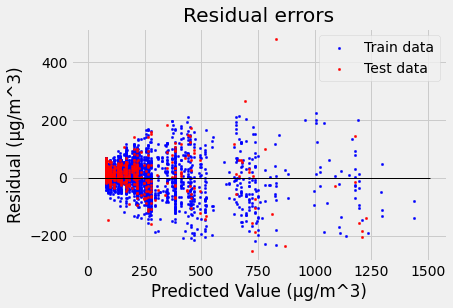

In [61]:
## AdaBoost

from sklearn.ensemble import AdaBoostRegressor


ada_boost_reg = AdaBoostRegressor(n_estimators=50)
ada_boost_reg.fit(X_train, y_train)

print("Scores Training")
ada_boost_reg_scores = cross_validate_scores(ada_boost_reg, X, y)
for key in ada_boost_reg_scores:
    print(key + ": " + str(ada_boost_reg_scores[key]))


resid_plot(ada_boost_reg, X_train, X_test)


Scores Training
[0.93993316 0.90891784 0.89889611 0.93844739 0.77850901 0.8540074
 0.91673721 0.93114759 0.88346244 0.91443741]
fit_time: 0.09355
score_time: 0.00635
test_explained_variance: 0.89823
test_neg_mean_absolute_error: -20.78542
test_neg_mean_squared_error: -1615.76032
test_neg_root_mean_squared_error: -37.47369
test_neg_median_absolute_error: -10.1209
test_r2: 0.89645
adj_r2: 0.89633


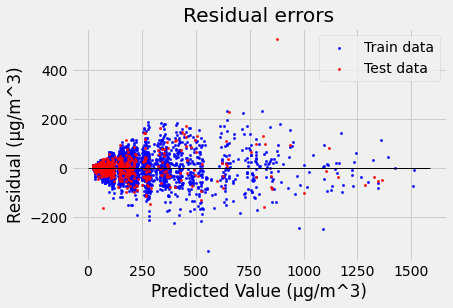

In [62]:
## XGBoost

import xgboost as xg

xgb_reg = xg.XGBRegressor(max_depth=2, n_estimators=40, verbosity = 0, random_state = 42)
xgb_reg.fit(X_train_scaled, y_train)

#Print Coefficients and Weight
# print("Coefficients: ")
# print("Intercept: " + str(ransac_reg.estimator_.intercept_))
# print(len(ransac_reg.estimator_.coef_))
# for i in range(len(X.columns)):
#     print(X.columns[i] + ": " + str(ransac_reg.estimator_.coef_[i]))

print("Scores Training")
xgb_reg_scores = cross_validate_scores(xgb_reg, X_scaled, y)
for key in xgb_reg_scores:
    print(key + ": " + str(xgb_reg_scores[key]))

resid_plot(xgb_reg, X_train_scaled, X_test_scaled)

In [63]:
## scores

sum_scores = {"Multiple Linear Regression": multi_lin_reg_scores, "Polynomical Regression": poly_reg_scores, "RANSAC Regression": ransac_reg_scores, "Decision Tree Regression": decision_tree_reg_scores, "Random Forest Regression": random_forest_reg_scores, "KNN Regression": knn_model_scores, "SVM Regression": svm_reg_scores, "ADA Boost Regression": ada_boost_reg_scores, "XGB Regression": xgb_reg_scores}
targets = {"R^2 adjusted": "adj_r2"}

for target in targets:
    print(target)
    for key in sum_scores:
        print(key + ": " + str(sum_scores[key][targets[target]]))
    print()
    

R^2 adjusted
Multiple Linear Regression: 0.90658
Polynomical Regression: 0.90828
RANSAC Regression: 0.90752
Decision Tree Regression: 0.88578
Random Forest Regression: 0.90511
KNN Regression: 0.86893
SVM Regression: 0.40444
ADA Boost Regression: 0.55507
XGB Regression: 0.89633



In [64]:
#choose best model to forecast with

model_dict = {"Multiple Linear Regression": multi_lin_reg, "Polynomical Regression": linreg_poly, "RANSAC Regression": ransac_reg, "Decision Tree Regression": decision_tree_reg, "Random Forest Regression": random_forest_reg, "KNN Regression": knn_model, "SVM Regression": svm_reg, "ADA Boost Regression": ada_boost_reg, "XGB Regression": xgb_reg}
sorter = "adj_r2"

max = 0
#find lowest score of
for key in model_dict:
    if (max < sum_scores[key]["adj_r2"]):
        max = sum_scores[key]["adj_r2"]
        best_model_key = key
best_model = model_dict[best_model_key]
best_model = multi_lin_reg
print(best_model_key)


Polynomical Regression


In [65]:
### TESTING

yPredln = multi_lin_reg.predict(X_test_scaled)
# yPredkn = knRegressor.predict(X_test_scaled)
# yPredsvr = svrRegressor.predict(X_test_scaled)

predR2ln = str((round((r2_score(y_test,yPredln)), 3)))
# predR2kn = str((round((r2_score(y_test,yPredkn)), 3)))
# predR2svr = str((round((r2_score(y_test,yPredsvr)), 3)))

# print(predR2ln, predR2kn, predR2svr)

The R^2 value for Linear Regression is   : -0.695


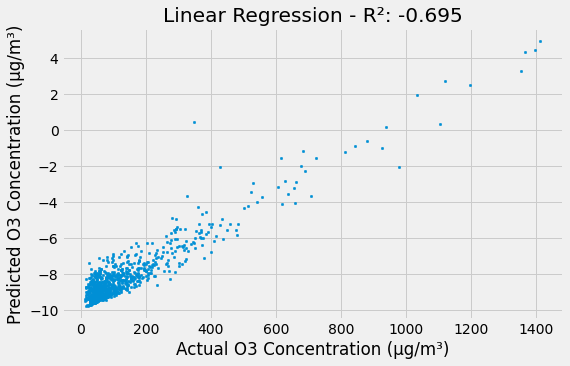

In [66]:
# ln reg


print('The R^2 value for Linear Regression is   :', round((r2_score(y_test,yPredln)), 3))
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
plt.scatter(y_test, yPredln, s= 6)

plt.xlabel('Actual O3 Concentration (µg/m³)')
plt.ylabel('Predicted O3 Concentration (µg/m³)')
plt.grid(b= True)
plt.title("Linear Regression - R²: %s" %predR2ln)
plt.show()


# print(len(X_test))
# print(len(yPredln))
# print(min(y_test), max(y_test))
# xspace = np.linspace(min(y_test), max(y_test), num = 1000)
# fig = plt.figure(figsize=(8, 5))
# ax1 = fig.add_subplot(111)
# plt.scatter(X_test.O3, y_test, s= 6)
# plt.scatter(xspace, multi_lin_reg.predict(xspace), s= 6)

# plt.xlabel('Actual O3 Concentration (µg/m³)')
# plt.ylabel('Predicted O3 Concentration (µg/m³)')
# plt.grid(b= True)
# plt.title("Linear Regression - R²: %s" %predR2ln)
# plt.show()


# # kn reg
# print('The R^2 value for KNN Regression is   :', round((r2_score(y_test,yPredkn)), 3))
# fig = plt.figure(figsize=(8, 5))
# ax1 = fig.add_subplot(111)
# plt.scatter(y_test, yPredkn, s= 6)

# plt.xlabel('Actual O3 Concentration (µg/m³)')
# plt.ylabel('Predicted O3 Concentration (µg/m³)')
# plt.grid(b= True)
# plt.title("KNN Regression - R²: %s" %predR2kn)
# plt.show()


# # svr reg
# print('The R^2 value for SVM Regression is   :', round((r2_score(y_test,yPredsvr)), 3))
# fig = plt.figure(figsize=(8, 5))
# ax1 = fig.add_subplot(111)
# plt.scatter(y_test, yPredsvr, s= 6)

# plt.xlabel('Actual O3 Concentration (µg/m³)')
# plt.ylabel('Predicted O3 Concentration (µg/m³)')
# plt.grid(b= True)
# plt.title("SVM Regression - R²: %s" %predR2svr)
# plt.show()

In [67]:
#forecasting using current data
from cmath import nan
import requests
from meteostat import Hourly
from datetime import datetime, timedelta

dict_pollutants = {"o3": nan, "pm2_5": nan, "pm10": nan, "co": nan, "so2": nan, "no2": nan, "temp": nan, "rhum": nan, "wspd": nan}

# pollutant data
headers = {"Accept": "application/json"}

# response = requests.get("http://api.waqi.info/feed/bangkok/?token=254d1bc84a6adf3f9448bc8d3a964b263441161b", headers=headers)
# pollutant_readings = response.text[response.text.index("\"iaqi\":{") + len("\"iaqi\":{"):response.text.index("},\"time\"")].split(",")
# for pollutant in pollutant_readings:
#     #  + len(pollutant.index("'\"")):pollutant.index("\":")
#     pollutant_type = pollutant[1:pollutant.index("\":")]
#     pollutant_value = float(pollutant[pollutant.index("v\":") + len("v\":"):pollutant.index("}")])
#     print(pollutant_type, pollutant_value)
#     dict_pollutants[pollutant_type] = pollutant_value

response = requests.get("http://api.openweathermap.org/data/2.5/air_pollution?lat={lat}&lon={lon}&appid={API}".format(lat = "13.7563", lon = "100.5018", API = "a0a139b51a7aed9183df55c619fca847"), headers= headers)
print(response.text)
pollutant_readings = response.text[response.text.index("components\":{") + len("components\":{"):response.text.index("},\"dt\"")].split(",")
for pollutant in pollutant_readings:
    pollutant_type = pollutant[1:pollutant.index("\":")]
    pollutant_value = float(pollutant[pollutant.index(":") + len(":"):])
    print(pollutant_type, pollutant_value)
    dict_pollutants[pollutant_type] = pollutant_value


#weather data
print(datetime.now())
data = Hourly("48455", datetime.now() - timedelta(hours = 1), datetime.now())
data = data.fetch()
print(data.iloc[0]["temp"], data.iloc[0]["rhum"], data.iloc[0]["wspd"])
dict_pollutants["temp"] = data.iloc[0]["temp"]
dict_pollutants["rhum"] = data.iloc[0]["rhum"]
dict_pollutants["wspd"] = data.iloc[0]["wspd"]

current_pollutants = list(dict_pollutants.values())[:9]
print(current_pollutants)


{"coord":{"lon":100.5018,"lat":13.7563},"list":[{"main":{"aqi":5},"components":{"co":3177.64,"no":116.23,"no2":25.36,"o3":0.33,"so2":68.67,"pm2_5":80.52,"pm10":118.26,"nh3":28.63},"dt":1662257342}]}
co 3177.64
no 116.23
no2 25.36
o3 0.33
so2 68.67
pm2_5 80.52
pm10 118.26
nh3 28.63
2022-09-03 22:16:03.514400
27.1 92.0 0.0
[0.33, 80.52, 118.26, 3177.64, 68.67, 25.36, 27.1, 92.0, 0.0]


In [68]:
#forecast values
X_forecast = pd.DataFrame(columns=["O3", "PM2.5", "PM10", "CO", "SO2", "NO2", "Temp", "RHum", "WSpd"])
X_forecast.loc[0] = current_pollutants
print(X_forecast)
print(X_test)
forecast = best_model.predict(X_forecast)
print(forecast)

     O3  PM2.5    PM10       CO    SO2    NO2  Temp  RHum  WSpd
0  0.33  80.52  118.26  3177.64  68.67  25.36  27.1  92.0   0.0
          O3   PM2.5    PM10       CO     SO2     NO2  Temp  RHum  WSpd
6142    0.04  201.36  201.36  7904.05  207.90   61.01  26.9  79.0   0.0
1406    0.00   56.06   56.06  1735.69   52.93   47.98  28.2  78.0   3.7
1934    0.00  118.50  118.50  3231.05   38.62   43.18  29.0  74.0   0.0
6864    0.21   64.63   64.63  3070.83   87.74   38.73  27.4  88.0   1.8
2303  125.89  428.15  428.15  7690.43  207.90  298.86  26.2  88.0   1.8
...      ...     ...     ...      ...     ...     ...   ...   ...   ...
2144    0.00   39.90   39.90  2296.45   61.99   32.56  34.5  55.0   5.4
2647    0.00  170.98  170.98  7797.24  150.68  157.65  33.9  57.0   3.7
1470   52.21  107.73  107.73  3311.16   92.51  143.95  33.0  56.0   5.4
8062   36.84  123.81  123.81  3337.86   51.02   78.14  21.6  64.0   0.0
8602    0.00   45.55   45.55  2109.53   30.52   34.96  30.3  60.0   3.7

[872 ro